<a href="https://colab.research.google.com/github/jdragu/K-C-Hackathon-Prediction/blob/main/Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hackathon Finalist Prediction

## Import libraries, load data

In [7]:
!pip install imbalanced-learn

In [8]:
!pip install plotly

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [10]:
# Mount google colab to my Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [11]:
# Load data
df=pd.read_csv('/content/K-C Hackathon/hackathon_ideas.csv')

df

,idea_name,description,general_benefits,region,submitted_estimate,service_line,category,original,actual_benefits_wc,actual_benefits_savings,...,judge_scalability,judge_crowd_validation,judge_weighted_avg,chatgpt_distruption_overview,chatgpt_ease_implementation,chatgpt_scalability,chatgpt_benefits,chatgpt_rationale,finalist,winner
0,Italy Payment Terms Harmonization,"After assessing DSO opportunities, the team id...",USD$4.2M improvement in AR approx. 8 days in D...,EMEA,4200000.0,OTC,AR-Payment Terms,1,3946441.0,224992.0,...,8,10,7,4.0,3.0,3.0,NaN,This idea proposes to simplify payment terms f...,1,0
1,LAO Preliminary PWC Report Driving timely R&am...,Brief Project Description: PWC and CCC reports...,To increase PWC and CCC visibility before mont...,LAO,0.0,GBS OPS,Forecast Improvement,1,0.0,0.0,...,,,,2.0,5.0,4.0,NaN,This idea proposes to provide preliminary PWC ...,0,0
2,LAO Payment Runs Optimization (From 3 to 2),"During 2020 and considering COVID-19 reality, ...","Approx USD$1.5M per month, USD$18M per year\r...",LAO,1500000.0,PTP,AP-Payment Terms,1,47392618.0,1267031.0,...,8,3,7,3.0,4.0,4.0,NaN,This idea proposes to move from 3 to 2 payment...,0,0
3,Global PWC General Ledger Benchmark,"Across KC, PWC estimation is standard in terms...",To carry out a GL benchmark across all PWC com...,Global,5000000.0,GBS OPS,Working Capital,1,0.0,0.0,...,10,10,6,3.0,3.0,4.0,NaN,This idea proposes to carry out a GL benchmark...,1,0
4,CCC Playbook and CCC - Road to 0 Days,"LAO GBS, in partnership with Finance &amp; Sup...",200% target execution by sub-region as of 2020...,LAO,10000000.0,GBS OPS,Working Capital,1,0.0,0.0,...,,,,4.0,4.0,4.0,NaN,This idea proposes to implement initiatives ac...,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,Monthly payment implementation of the Costa Ri...,"In 2023, the payroll payment for the Costa Ric...",The benefit of extending the payment terms for...,LAO,1000000.0,Treasury,NaN,1,NaN,NaN,...,,,,3.0,4.0,4.0,4.0,"This idea is not entirely new, but it propose...",0,0
316,Interstellar investments,The interest earned on investments in banks in...,we expect to have income of up to $498k,LAO,498000.0,Treasury,NaN,1,NaN,NaN,...,3,3,3,2.0,1.0,4.0,3.0,"This idea is not disruptive, but it has the p...",1,0
317,Papel Zero,The objective of the project is the eliminatio...,Positive impact on the environment through fib...,LAO,12000.0,PTP,NaN,1,NaN,NaN,...,NaN,NaN,NaN,4.0,3.0,3.0,4.0,This idea is disruptive as it aims to elimina...,0,0
318,Sputnik,The implementation of a Ticketing system in Po...,Improvement in the resolution of incidents tha...,LAO,NaN,Pricing,NaN,1,NaN,NaN,...,NaN,NaN,NaN,4.0,3.0,4.0,3.0,The idea proposes a comprehensive solution to...,0,0


## Preprocess data

### Check for missing values

In [12]:
df.isna().sum()

,0
idea_name,1
description,3
general_benefits,4
region,36
submitted_estimate,45
service_line,1
category,81
original,0
actual_benefits_wc,80
actual_benefits_savings,86


In [13]:
df

,idea_name,description,general_benefits,region,submitted_estimate,service_line,category,original,actual_benefits_wc,actual_benefits_savings,...,judge_scalability,judge_crowd_validation,judge_weighted_avg,chatgpt_distruption_overview,chatgpt_ease_implementation,chatgpt_scalability,chatgpt_benefits,chatgpt_rationale,finalist,winner
0,Italy Payment Terms Harmonization,"After assessing DSO opportunities, the team id...",USD$4.2M improvement in AR approx. 8 days in D...,EMEA,4200000.0,OTC,AR-Payment Terms,1,3946441.0,224992.0,...,8,10,7,4.0,3.0,3.0,NaN,This idea proposes to simplify payment terms f...,1,0
1,LAO Preliminary PWC Report Driving timely R&am...,Brief Project Description: PWC and CCC reports...,To increase PWC and CCC visibility before mont...,LAO,0.0,GBS OPS,Forecast Improvement,1,0.0,0.0,...,,,,2.0,5.0,4.0,NaN,This idea proposes to provide preliminary PWC ...,0,0
2,LAO Payment Runs Optimization (From 3 to 2),"During 2020 and considering COVID-19 reality, ...","Approx USD$1.5M per month, USD$18M per year\r...",LAO,1500000.0,PTP,AP-Payment Terms,1,47392618.0,1267031.0,...,8,3,7,3.0,4.0,4.0,NaN,This idea proposes to move from 3 to 2 payment...,0,0
3,Global PWC General Ledger Benchmark,"Across KC, PWC estimation is standard in terms...",To carry out a GL benchmark across all PWC com...,Global,5000000.0,GBS OPS,Working Capital,1,0.0,0.0,...,10,10,6,3.0,3.0,4.0,NaN,This idea proposes to carry out a GL benchmark...,1,0
4,CCC Playbook and CCC - Road to 0 Days,"LAO GBS, in partnership with Finance &amp; Sup...",200% target execution by sub-region as of 2020...,LAO,10000000.0,GBS OPS,Working Capital,1,0.0,0.0,...,,,,4.0,4.0,4.0,NaN,This idea proposes to implement initiatives ac...,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,Monthly payment implementation of the Costa Ri...,"In 2023, the payroll payment for the Costa Ric...",The benefit of extending the payment terms for...,LAO,1000000.0,Treasury,NaN,1,NaN,NaN,...,,,,3.0,4.0,4.0,4.0,"This idea is not entirely new, but it propose...",0,0
316,Interstellar investments,The interest earned on investments in banks in...,we expect to have income of up to $498k,LAO,498000.0,Treasury,NaN,1,NaN,NaN,...,3,3,3,2.0,1.0,4.0,3.0,"This idea is not disruptive, but it has the p...",1,0
317,Papel Zero,The objective of the project is the eliminatio...,Positive impact on the environment through fib...,LAO,12000.0,PTP,NaN,1,NaN,NaN,...,NaN,NaN,NaN,4.0,3.0,3.0,4.0,This idea is disruptive as it aims to elimina...,0,0
318,Sputnik,The implementation of a Ticketing system in Po...,Improvement in the resolution of incidents tha...,LAO,NaN,Pricing,NaN,1,NaN,NaN,...,NaN,NaN,NaN,4.0,3.0,4.0,3.0,The idea proposes a comprehensive solution to...,0,0


In [14]:
df.replace('', np.nan, inplace=True)

### Vectorize descriptive variables

In [15]:
# Fill missing values
df['description'].fillna('Missing', inplace=True)
df['general_benefits'].fillna('Missing', inplace=True)
df['chatgpt_rationale'].fillna('Missing', inplace=True)

<ipython-input-15-fc617c937813>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['description'].fillna('Missing', inplace=True)
<ipython-input-15-fc617c937813>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [16]:
# Ensure all relevant columns are of string type
df['description'] = df['description'].astype(str)
df['general_benefits'] = df['general_benefits'].astype(str)
df['chatgpt_rationale'] = df['chatgpt_rationale'].astype(str)

In [17]:
# Vectorize the 'description' column
tfidf_description = TfidfVectorizer(max_features=100)
description_tfidf = tfidf_description.fit_transform(df['description']).toarray()
description_df = pd.DataFrame(description_tfidf, columns=tfidf_description.get_feature_names_out())
df = pd.concat([df, description_df], axis=1).drop(columns=['description'])

In [18]:
# Vectorize the 'general_benefits' column
tfidf_general_benefits = TfidfVectorizer(max_features=100)
general_benefits_tfidf = tfidf_general_benefits.fit_transform(df['general_benefits']).toarray()
general_benefits_df = pd.DataFrame(general_benefits_tfidf, columns=tfidf_general_benefits.get_feature_names_out())
df = pd.concat([df, general_benefits_df], axis=1).drop(columns=['general_benefits'])

In [19]:
# Vectorize the 'chatgpt_rationale' column
tfidf_chatgpt_rationale = TfidfVectorizer(max_features=100)
chatgpt_rationale_tfidf = tfidf_chatgpt_rationale.fit_transform(df['chatgpt_rationale']).toarray()
chatgpt_rationale_df = pd.DataFrame(chatgpt_rationale_tfidf, columns=tfidf_chatgpt_rationale.get_feature_names_out())
df = pd.concat([df, chatgpt_rationale_df], axis=1).drop(columns=['chatgpt_rationale'])

### Encode categorical variables

In [20]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['idea_name', 'region', 'service_line', 'category']
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

### Normalize numerical variables

In [21]:
# Convert 'Missing' strings to NaNs in numerical columns
numerical_columns = ['actual_benefits_wc', 'actual_benefits_savings',
                     'expert_overview', 'expert_ease_implementation', 'expert_scalability',
                     'expert_crowd_validation', 'expert_weighted_avg',
                     'judge_overview', 'judge_ease_implementation', 'judge_scalability',
                     'judge_crowd_validation', 'judge_weighted_avg',
                     'chatgpt_distruption_overview', 'chatgpt_ease_implementation',
                     'chatgpt_scalability', 'chatgpt_benefits']

df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

In [22]:
# Coerce non-numeric values to numeric and fill remaining NaNs with 0
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

In [23]:
# Normalize numerical features
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

### Fill in "original" NaN with an assumed 1 for originality

In [24]:
# Fill NaN values in the 'original' column with 1s
df['original'] = df['original'].fillna(1)

# Check to ensure the filling is done
print(df['original'].isnull().sum())

0


## Fill in "submitted_estimate" blanks with 0

In [25]:
# Fill NaN values in the 'submitted_estimate' column with 0
df['submitted_estimate'] = df['submitted_estimate'].fillna(0)

# Verify the change
print(df['submitted_estimate'].isnull().sum())  # Should be 0

0


### Drop irrelevant columns

In [26]:
# Let's list out all the columns
## There are lots of new ones we got after undergoing vectorization of description columns and encoding categorical variables
### Many may not be useful
# Set display options to show all columns
pd.set_option('display.max_columns', None)

In [27]:
df

,idea_name,region,submitted_estimate,service_line,category,original,actual_benefits_wc,actual_benefits_savings,expert_overview,expert_ease_implementation,expert_scalability,expert_crowd_validation,expert_weighted_avg,judge_overview,judge_ease_implementation,judge_scalability,judge_crowd_validation,judge_weighted_avg,chatgpt_distruption_overview,chatgpt_ease_implementation,chatgpt_scalability,chatgpt_benefits,finalist,winner,accounts,across,all,also,an,and,are,as,at,bank,based,be,business,but,by,can,cash,celonis,cost,could,credit,currently,customer,customers,data,date,days,de,due,each,end,for,from,gbs,has,have,hours,identify,if,in,information,into,invoice,invoices,is,it,kc,lao,manual,month,more,not,of,on,one,only,or,order,other,our,paid,pay,payment,payments,payroll,per,process,project,report,sales,sap,so,system,team,term,terms,that,the,their,there,these,this,through,time,to,up,us,value,vendor,vendors,via,was,we,were,which,will,with,working,would,year,accuracy,across,all,also,amount,an,and,are,as,at,bank,be,benefit,benefits,better,between,business,by,can,capital,cash,control,controls,cost,could,credit,customer,customers,data,days,de,discount,due,each,end,financial,flow,for,from,has,have,hours,if,impact,improve,improved,improvement,in,increase,invoices,is,it,kc,making,management,manual,month,more,oacute,of,on,or,other,our,pay,payment,payments,payroll,per,potential,process,processing,project,reduce,reducing,reduction,sales,saving,savings,system,team,terms,that,the,their,this,time,to,tool,up,usd,vendors,we,which,will,with,work,working,would,year,aims,an,and,applicable,applied,are,as,be,benefits,better,both,but,by,can,capital,cash,changes,complex,cost,current,customer,customers,data,different,disruption,disruptive,due,ease,easy,efficiency,effort,entirely,feasible,for,from,geographical,geographies,globally,has,high,highly,idea,implement,implementation,improve,in,include,including,innovative,is,it,level,mainly,manual,may,mid,moderate,more,need,new,not,of,on,other,overview,payment,potential,process,proposes,qualitative,quantitative,reduce,reducing,replicable,replicated,require,requires,savings,scalable,scalation,scaled,significant,some,specific,state,term,terms,that,the,this,time,to,too,upgraded,very,way,which,while,with,working
0,159,1,4200000.0,27,11,1,1.110846,0.150542,2.127251,-1.023216,0.654475,1.798103,1.154930,5.404507,0.873787,3.430706,6.829912,3.888816,1.119191,-0.074563,-0.938771,-1.795978,1,0,0.0,0.199525,0.000000,0.0,0.0,0.224050,0.266043,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.125785,0.000000,0.521130,0.000000,0.199525,0.0,0.0,0.185992,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.086009,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.116499,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.292120,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.157092,0.0,0.356685,0.129579,0.295919,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.210466,0.000000,0.000000,0.223686,0.000000,0.143230,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.179673,0.169054,0.0,0.0,0.0,0.162636,0.0,0.149129,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.129835,0.0,0.000000,0.133297,0.0,0.0,0.000000,0.0,0.0,0.0,0.320757,0.0,0.196646,0.0,0.0,0.0,0.000000,0.193363,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.187407,0.201527,0.000000,0.0,0.135128,0.0,0.000000,0.0,0.0,0.000000,0.187407,0.0,0.0,0.258195,0.114303,0.0,0.0,0.000000,0.0,0.140038,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.184687,0.0,0.0,0.0,0.0,0.0,0.334376,0.000000,0.417372,0.0,0.000000,0.133297,0.158510,0.0,0.000000,0.190292,0.000000,0.000000,0.184687,0.000000,0.122858,0.0,0.000000,0.000000,0.000000,0.000000,0.120238,0.192947,0.000000,0.0,0.066262,0.077887,0.000000,0.052492,0.0,0.100495,0.071706,0.128145,0.000000,0.0,0.384436,0.14982,0.0,0.0,0.000000,0.0,0.144

In [28]:
# Let's drop the filler words, like 'an', 'and', etc
df.drop(['an','and','are','as','at','be','but','by','can','could','de','each','from','has',
        'have','if','in','into','is','it','not','of','on','one','only','or','other','our',
        'per','so','that','the','their','there','these','this','through','to','us','via','we',
        'was','were','which','will','with','would','also'],axis=1, inplace=True)

In [29]:
# Round 2 of dropping irrelevant words
df.drop(['for','very'],axis=1, inplace=True)

## Train the data

### Split into train and test

In [30]:
# Define features and target
X = df.drop(['finalist', 'winner'], axis=1)
y = df['finalist']

In [31]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

### Train the model

In [33]:
# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

## Evaluate the model

In [34]:
# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.984375
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.83      0.91         6

    accuracy                           0.98        64
   macro avg       0.99      0.92      0.95        64
weighted avg       0.98      0.98      0.98        64

Confusion Matrix:
 [[58  0]
 [ 1  5]]


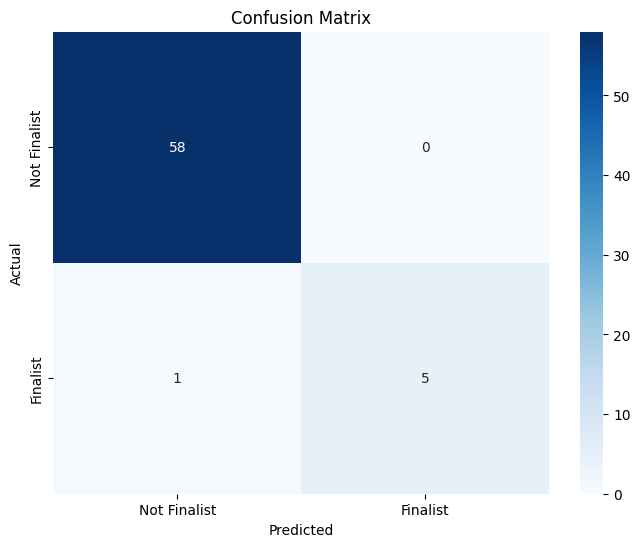

In [35]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Finalist', 'Finalist'], yticklabels=['Not Finalist', 'Finalist'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Feature importance

In [36]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better readability
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(feature_importance_df.head(10))

                       Feature  Importance
16      judge_crowd_validation    0.126795
15           judge_scalability    0.119645
13              judge_overview    0.117697
17          judge_weighted_avg    0.088716
14   judge_ease_implementation    0.084739
12         expert_weighted_avg    0.025137
189               quantitative    0.021659
30                        cost    0.020838
205                      terms    0.018782
8              expert_overview    0.018543


In [37]:
# Create an interactive bar plot
fig = px.bar(feature_importance_df, x='Importance', y='Feature', title='Feature Importances', orientation='h')

# Update layout for scrollability
fig.update_layout(
    height=800,  # Adjust height as needed
    yaxis={'categoryorder':'total ascending'},
    yaxis_tickfont_size=10
)

fig.show()

# Hackathon Confusion Matrix

**Let's build a confusion matrix with the following characteristics:**

True Positive: High Scored idea that delivered benefits, delivering their commitment in money or more

True Negative: High Scored idea that underdelivered benefits, delivered none or below commitment

False Positive: Low scored idea that delivered benefits

False Negative: Low scored idea that didn't deliver benefits

In [38]:
# Load in data
cf=pd.read_csv('/content/K-C Hackathon/hackathon_ideas.csv')

cf

,idea_name,description,general_benefits,region,submitted_estimate,service_line,category,original,actual_benefits_wc,actual_benefits_savings,expert_overview,expert_ease_implementation,expert_scalability,expert_crowd_validation,expert_weighted_avg,judge_overview,judge_ease_implementation,judge_scalability,judge_crowd_validation,judge_weighted_avg,chatgpt_distruption_overview,chatgpt_ease_implementation,chatgpt_scalability,chatgpt_benefits,chatgpt_rationale,finalist,winner
0,Italy Payment Terms Harmonization,"After assessing DSO opportunities, the team id...",USD$4.2M improvement in AR approx. 8 days in D...,EMEA,4200000.0,OTC,AR-Payment Terms,1,3946441.0,224992.0,10,2,8,10,7,10,2,8,10,7,4.0,3.0,3.0,NaN,This idea proposes to simplify payment terms f...,1,0
1,LAO Preliminary PWC Report Driving timely R&am...,Brief Project Description: PWC and CCC reports...,To increase PWC and CCC visibility before mont...,LAO,0.0,GBS OPS,Forecast Improvement,1,0.0,0.0,5,3,9,2,5,,,,,,2.0,5.0,4.0,NaN,This idea proposes to provide preliminary PWC ...,0,0
2,LAO Payment Runs Optimization (From 3 to 2),"During 2020 and considering COVID-19 reality, ...","Approx USD$1.5M per month, USD$18M per year\r...",LAO,1500000.0,PTP,AP-Payment Terms,1,47392618.0,1267031.0,10,6,8,3,7,10,6,8,3,7,3.0,4.0,4.0,NaN,This idea proposes to move from 3 to 2 payment...,0,0
3,Global PWC General Ledger Benchmark,"Across KC, PWC estimation is standard in terms...",To carry out a GL benchmark across all PWC com...,Global,5000000.0,GBS OPS,Working Capital,1,0.0,0.0,5,2,10,10,6,5,2,10,10,6,3.0,3.0,4.0,NaN,This idea proposes to carry out a GL benchmark...,1,0
4,CCC Playbook and CCC - Road to 0 Days,"LAO GBS, in partnership with Finance &amp; Sup...",200% target execution by sub-region as of 2020...,LAO,10000000.0,GBS OPS,Working Capital,1,0.0,0.0,4,5,8,2,5,,,,,,4.0,4.0,4.0,NaN,This idea proposes to implement initiatives ac...,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,Monthly payment implementation of the Costa Ri...,"In 2023, the payroll payment for the Costa Ric...",The benefit of extending the payment terms for...,LAO,1000000.0,Treasury,NaN,1,NaN,NaN,4,3,3,1,3,,,,,,3.0,4.0,4.0,4.0,"This idea is not entirely new, but it propose...",0,0
316,Interstellar investments,The interest earned on investments in banks in...,we expect to have income of up to $498k,LAO,498000.0,Treasury,NaN,1,NaN,NaN,8,10,10,0,7,3,4,3,3,3,2.0,1.0,4.0,3.0,"This idea is not disruptive, but it has the p...",1,0
317,Papel Zero,The objective of the project is the eliminatio...,Positive impact on the environment through fib...,LAO,12000.0,PTP,NaN,1,NaN,NaN,2,7,3,0.425531915,3.385106383,NaN,NaN,NaN,NaN,NaN,4.0,3.0,3.0,4.0,This idea is disruptive as it aims to elimina...,0,0
318,Sputnik,The implementation of a Ticketing system in Po...,Improvement in the resolution of incidents tha...,LAO,NaN,Pricing,NaN,1,NaN,NaN,6,6,5,0.425531915,4.685106383,NaN,NaN,NaN,NaN,NaN,4.0,3.0,4.0,3.0,The idea proposes a comprehensive solution to...,0,0


In [39]:
# Fill NaN values in the 'submitted_estimate', 'actual_benefits_wc', 'actual_benefits_savings', and 'expert_weighted_avg' columns with 0
cf['submitted_estimate'] = cf['submitted_estimate'].fillna(0)
cf['actual_benefits_wc'] = cf['actual_benefits_wc'].fillna(0)
cf['actual_benefits_savings'] = cf['actual_benefits_savings'].fillna(0)
cf['expert_weighted_avg'] = cf['expert_weighted_avg'].fillna(0)

# Ensure 'expert_weighted_avg' values are numeric
cf['expert_weighted_avg'] = pd.to_numeric(cf['expert_weighted_avg'], errors='coerce').fillna(0)

In [40]:
# Ensure all values are numeric
cf['submitted_estimate'] = pd.to_numeric(cf['submitted_estimate'], errors='coerce').fillna(0)
cf['actual_benefits_wc'] = pd.to_numeric(cf['actual_benefits_wc'], errors='coerce').fillna(0)
cf['actual_benefits_savings'] = pd.to_numeric(cf['actual_benefits_savings'], errors='coerce').fillna(0)

In [41]:
# Subset the dataframe using .loc
subset_cf = cf.loc[:, ['idea_name', 'submitted_estimate', 'actual_benefits_wc', 'actual_benefits_savings','expert_weighted_avg']]

# Convert to whole numbers
subset_cf['submitted_estimate'] = subset_cf['submitted_estimate'].astype(int)
subset_cf['actual_benefits_wc'] = subset_cf['actual_benefits_wc'].astype(int)
subset_cf['actual_benefits_savings'] = subset_cf['actual_benefits_savings'].astype(int)
subset_cf['expert_weighted_avg'] = subset_cf['expert_weighted_avg'].astype(int)

# Display the subset dataframe to check
print(subset_cf)

                                             idea_name  submitted_estimate  \
0                    Italy Payment Terms Harmonization             4200000   
1    LAO Preliminary PWC Report Driving timely R&am...                   0   
2          LAO Payment Runs Optimization (From 3 to 2)             1500000   
3                  Global PWC General Ledger Benchmark             5000000   
4                CCC Playbook and CCC - Road to 0 Days            10000000   
..                                                 ...                 ...   
315  Monthly payment implementation of the Costa Ri...             1000000   
316                           Interstellar investments              498000   
317                                         Papel Zero               12000   
318                                            Sputnik                   0   
319                   Celonis Report of Payments in -7                   0   

     actual_benefits_wc  actual_benefits_savings  expert_weight

In [42]:
# Define a threshold for high scoring ideas
high_score_threshold = 5

In [43]:
# Check data types
subset_cf.dtypes

,0
idea_name,object
submitted_estimate,int64
actual_benefits_wc,int64
actual_benefits_savings,int64
expert_weighted_avg,int64


In [44]:
# Define criteria for high and low scoring ideas
subset_cf['high_scored'] = np.where(subset_cf['expert_weighted_avg'] >= high_score_threshold, 'High', 'Low')

In [45]:
# Define criteria for delivered benefits
subset_cf['delivered_benefits'] = np.where((subset_cf['actual_benefits_wc'] + subset_cf['actual_benefits_savings']) >= subset_cf['submitted_estimate'], 'Delivered', 'Underdelivered')

In [46]:
# Create the confusion matrix labels
conditions = [
    (subset_cf['high_scored'] == 'High') & (subset_cf['delivered_benefits'] == 'Delivered'),
    (subset_cf['high_scored'] == 'High') & (subset_cf['delivered_benefits'] == 'Underdelivered'),
    (subset_cf['high_scored'] == 'Low') & (subset_cf['delivered_benefits'] == 'Delivered'),
    (subset_cf['high_scored'] == 'Low') & (subset_cf['delivered_benefits'] == 'Underdelivered')
]

labels = ['True Positive', 'True Negative', 'False Positive', 'False Negative']

In [47]:
# Apply the labels
subset_cf['confusion_matrix'] = np.select(conditions, labels, default='Unknown')

In [48]:
# Count the occurrences of each label
conf_matrix_counts = subset_cf['confusion_matrix'].value_counts()

In [49]:
# Print the confusion matrix
print(conf_matrix_counts)

confusion_matrix
True Negative     115
True Positive      79
False Positive     71
False Negative     55
Name: count, dtype: int64


In [50]:
# Check to make sure subset looks right
subset_cf

,idea_name,submitted_estimate,actual_benefits_wc,actual_benefits_savings,expert_weighted_avg,high_scored,delivered_benefits,confusion_matrix
0,Italy Payment Terms Harmonization,4200000,3946441,224992,7,High,Underdelivered,True Negative
1,LAO Preliminary PWC Report Driving timely R&am...,0,0,0,5,High,Delivered,True Positive
2,LAO Payment Runs Optimization (From 3 to 2),1500000,47392618,1267031,7,High,Delivered,True Positive
3,Global PWC General Ledger Benchmark,5000000,0,0,6,High,Underdelivered,True Negative
4,CCC Playbook and CCC - Road to 0 Days,10000000,0,0,5,High,Underdelivered,True Negative
...,...,...,...,...,...,...,...,...
315,Monthly payment implementation of the Costa Ri...,1000000,0,0,3,Low,Underdelivered,False Negative
316,Interstellar investments,498000,0,0,7,High,Underdelivered,True Negative
317,Papel Zero,12000,0,0,3,Low,Underdelivered,False Negative
318,Sputnik,0,0,0,4,Low,Delivered,False Positive


## Visualize the matrix

In [51]:
# Create a DataFrame for the confusion matrix
conf_matrix_df = pd.DataFrame([[conf_matrix_counts.get('True Positive', 0), conf_matrix_counts.get('False Positive', 0)],
                               [conf_matrix_counts.get('False Negative', 0), conf_matrix_counts.get('True Negative', 0)]],
                              index=['High Scored', 'Low Scored'],
                              columns=['Delivered Benefits', 'Underdelivered Benefits'])

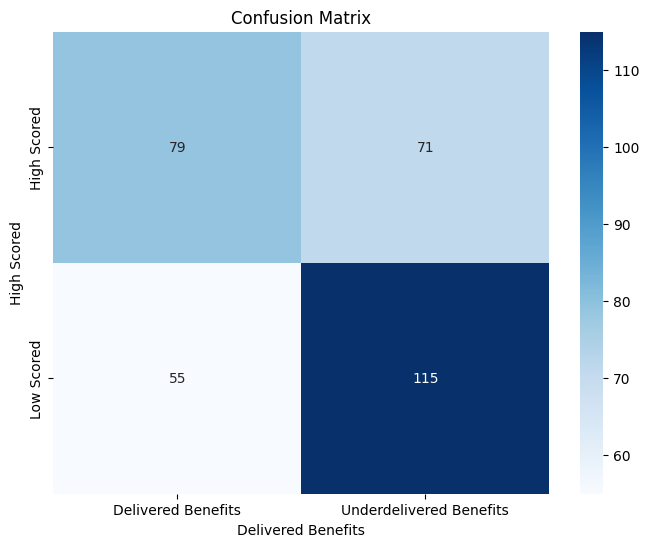

In [52]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Delivered Benefits')
plt.ylabel('High Scored')
plt.title('Confusion Matrix')
plt.show()

In [53]:
# Now let's visualize the confusion matrix details in a table
table_cf = subset_cf

table_cf

,idea_name,submitted_estimate,actual_benefits_wc,actual_benefits_savings,expert_weighted_avg,high_scored,delivered_benefits,confusion_matrix
0,Italy Payment Terms Harmonization,4200000,3946441,224992,7,High,Underdelivered,True Negative
1,LAO Preliminary PWC Report Driving timely R&am...,0,0,0,5,High,Delivered,True Positive
2,LAO Payment Runs Optimization (From 3 to 2),1500000,47392618,1267031,7,High,Delivered,True Positive
3,Global PWC General Ledger Benchmark,5000000,0,0,6,High,Underdelivered,True Negative
4,CCC Playbook and CCC - Road to 0 Days,10000000,0,0,5,High,Underdelivered,True Negative
...,...,...,...,...,...,...,...,...
315,Monthly payment implementation of the Costa Ri...,1000000,0,0,3,Low,Underdelivered,False Negative
316,Interstellar investments,498000,0,0,7,High,Underdelivered,True Negative
317,Papel Zero,12000,0,0,3,Low,Underdelivered,False Negative
318,Sputnik,0,0,0,4,Low,Delivered,False Positive


In [54]:
# Convert to dollar amounts
table_cf['submitted_estimate'] = table_cf['submitted_estimate'].apply(lambda x: f"${x:,}")
table_cf['actual_benefits_wc'] = table_cf['actual_benefits_wc'].apply(lambda x: f"${x:,}")
table_cf['actual_benefits_savings'] = table_cf['actual_benefits_savings'].apply(lambda x: f"${x:,}")

In [55]:
# Rename columns
subset_cf.columns = [
    'Idea Name', 'Submitted Estimate', 'Actual Benefits (Working Capital)',
    'Actual Benefits (Savings)', 'Expert Weighted Average', 'Score', 'Delivered Benefits', 'Confusion Matrix Result'
]

# Set display option to show all rows and remove index
pd.set_option('display.max_rows', None)

# Set display options to show all columns and rows without truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Display the subset dataframe
table_cf

,Idea Name,Submitted Estimate,Actual Benefits (Working Capital),Actual Benefits (Savings),Expert Weighted Average,Score,Delivered Benefits,Confusion Matrix Result
0,Italy Payment Terms Harmonization,"$4,200,000","$3,946,441","$224,992",7,High,Underdelivered,True Negative
1,LAO Preliminary PWC Report Driving timely R&amp;Os,$0,$0,$0,5,High,Delivered,True Positive
2,LAO Payment Runs Optimization (From 3 to 2),"$1,500,000","$47,392,618","$1,267,031",7,High,Delivered,True Positive
3,Global PWC General Ledger Benchmark,"$5,000,000",$0,$0,6,High,Underdelivered,True Negative
4,CCC Playbook and CCC - Road to 0 Days,"$10,000,000",$0,$0,5,High,Underdelivered,True Negative
5,LAO Cash Process End to End Transformation-Revenue Assurance Project,$0,$0,$0,0,Low,Delivered,False Positive
6,Improvisation on timeliness and unallocated cash - EMEA,$0,$0,$0,2,Low,Delivered,False Positive
7,Supply Chain Finance,$0,$0,"$286,054",6,High,Delivered,True Positive
8,Intercompany Restructuration,$0,$0,$0,5,High,Delivered,True Positive
9,CAPEX Forecast Precision,$0,$0,$0,3,Low,Delivered,False Positive
